# Working with W2V Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from collections import defaultdict

import gensim
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

from preprocessing_funcs import clean_tweet, get_hashtags, hashtag_dict

In [2]:
# to load the trained w2v model
model = gensim.models.Word2Vec.load("w2v.model")

In [3]:
model

## Word Similarity Scores

In [4]:
hc = ['hillary', 'clinton', 'hillary_clinton']
dt = ['donald', 'trump', 'donald_trump']

In [5]:
def word_scores(wv2_similarity_scores):
    print("Word Similarity Scores")
    print("---------------------------")
    for word, score in wv2_similarity_scores: 
        print("%-20s %4.4f" % (word, score))

In [6]:
num_words = 19

top_hc = model.wv.most_similar(positive=hc, topn=num_words)

word_scores(top_hc)

Word Similarity Scores
---------------------------
crookedhillary       0.5648
she                  0.5189
her                  0.5146
clinton_camp         0.5061
trump                0.5055
hillaryhealth        0.4859
dropouthillary       0.4701
hillarysemails       0.4475
donna_brazile        0.4452
dnc                  0.4370
indicthillary        0.4346
emails_show          0.4331
hillarys_emails      0.4320
huma_abedin          0.4319
jillstein            0.4315
hillarys             0.4312
colin_powell         0.4307
wikileaks            0.4298
bernieorbust         0.4296


In [7]:
num_words = 19
top_dt = model.wv.most_similar(positive=dt, topn=num_words)

word_scores(top_dt)

Word Similarity Scores
---------------------------
real_donald          0.4503
clinton              0.4357
hillary_clinton      0.4305
hillary              0.4121
politics_extra       0.4043
president            0.3952
trumptrain_maga      0.3762
thehill              0.3700
christie             0.3634
kellyanne_conway     0.3526
morning_joe          0.3485
obama                0.3468
evan_mcmullin        0.3454
politics             0.3425
lindsey_graham       0.3387
mike_pence           0.3384
skipping             0.3367
vice_presidential    0.3354
apologized           0.3337


In [8]:
words_to_exclude = ['hillary_clinton','clinton', 'hillary','trump','donald_trump', 
                    'real_donald', 'him', 'he', 'she', 'her', 'trumps', 'hillarys', 'trum']

In [9]:
hc_words = [word[0] for word in top_hc if word[0] not in words_to_exclude]
len(hc_words)

15

In [10]:
dt_words = [word[0] for word in top_dt if word[0] not in words_to_exclude]
len(dt_words)

15

In [11]:
def word_sim_scores(w1_list, w2_list, word_list):
    w1_scores, w2_scores = [], []
    
    print('Word Similiarity Scores')
    print('-----------------------------------')
    print(f'Topic               {w1_list[1]}   {w2_list[1]}')
    print('-----------------------------------')
    for word in word_list:
        w1_score = max([model.wv.similarity(w1, word) for w1 in w1_list])
        w2_score = max([model.wv.similarity(w2, word) for w2 in w2_list])
        print("%-20s %4.4f  %4.4f" % (word, w1_score, w2_score))
        w1_scores.append(w1_score)
        w2_scores.append(w2_score)
        
    return w1_scores, w2_scores    

In [12]:
print("Hillary Clinton")
hc_words_hc_scores, hc_words_dt_scores = word_sim_scores(hc, dt, hc_words)

Hillary Clinton
Word Similiarity Scores
-----------------------------------
Topic               clinton   trump
-----------------------------------
crookedhillary       0.5676  0.3362
clinton_camp         0.5303  0.2356
hillaryhealth        0.4754  0.2077
dropouthillary       0.4699  0.2769
hillarysemails       0.4405  0.1293
donna_brazile        0.4081  0.2262
dnc                  0.4722  0.2929
indicthillary        0.4432  0.1871
emails_show          0.4831  0.1407
hillarys_emails      0.4172  0.0819
huma_abedin          0.4515  0.1378
jillstein            0.4129  0.2579
colin_powell         0.3998  0.1910
wikileaks            0.4376  0.2491
bernieorbust         0.4105  0.2550


In [13]:
print("Donald Trump")
dt_words_hc_scores, dt_words_dt_scores = word_sim_scores(hc, dt, dt_words)

Donald Trump
Word Similiarity Scores
-----------------------------------
Topic               clinton   trump
-----------------------------------
politics_extra       0.4409  0.4848
president            0.2741  0.4140
trumptrain_maga      0.2203  0.4161
thehill              0.2411  0.3834
christie             0.3518  0.3772
kellyanne_conway     0.2392  0.3370
morning_joe          0.2259  0.3581
obama                0.3326  0.4290
evan_mcmullin        0.1606  0.3791
politics             0.4395  0.3850
lindsey_graham       0.2813  0.2952
mike_pence           0.2467  0.3154
skipping             0.1370  0.2849
vice_presidential    0.3092  0.3464
apologized           0.3662  0.3195


## Plotting Word Similarity Scores

In [14]:
def annotate_points(x, y, label):
    for i, txt in enumerate(label):
        plt.annotate(txt,
                     xy=(x[i], y[i]),
                     xytext=(10, 0), textcoords='offset points',
                     fontsize=12)

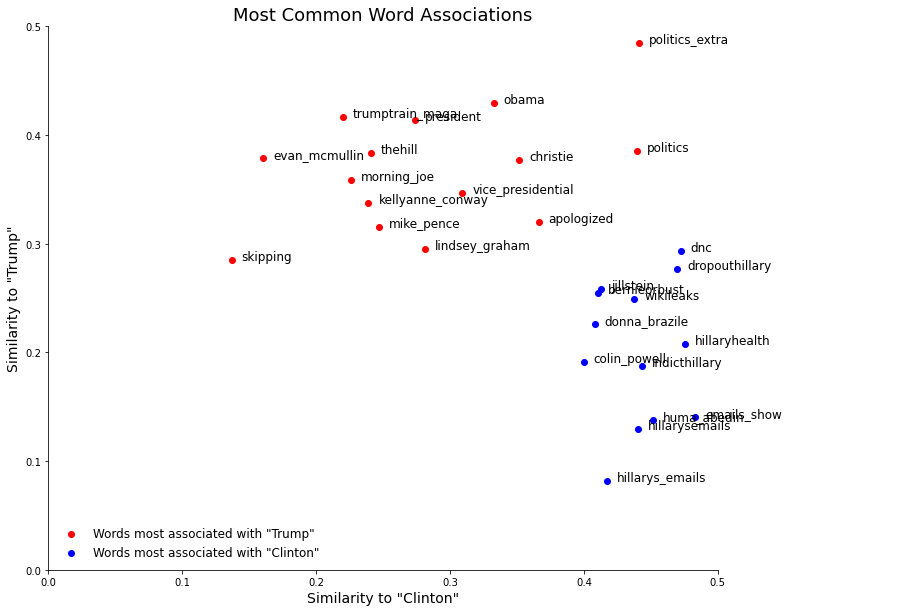

In [15]:
plt.figure(figsize=(12,10))

# HC words
plt.scatter(dt_words_hc_scores, dt_words_dt_scores, color='r', 
            label='Words most associated with "Trump"')

# DT Words
plt.scatter(hc_words_hc_scores, hc_words_dt_scores, color='b', 
            label='Words most associated with "Clinton"')

# Point annotations
annotate_points(dt_words_hc_scores, dt_words_dt_scores, dt_words)
annotate_points(hc_words_hc_scores, hc_words_dt_scores, hc_words)

# figure formatting
plt.xlabel('Similarity to "Clinton"', fontsize=14)
plt.ylabel('Similarity to "Trump"',fontsize=14)
plt.title('Most Common Word Associations', fontsize=18)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.legend(loc='lower left', frameon=False, fontsize=12)
sns.despine()

## Plotting Word Embeddings with TSNE

In [16]:
def tnse_plots(word_lists, 
               colors=['red', 'blue'], 
               title='TNSE Scatterplot',
               point_labels=True):
    
    plt.figure(figsize=(14, 8))
    plt.title(title, fontsize=16)
    sns.despine()
    
    i = 0
    
    for word_list in word_lists:
        wvs = model.wv[word_list]
        labels = word_list

        tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
        np.set_printoptions(suppress=True)
        T = tsne.fit_transform(wvs)

        plt.scatter(T[:, 0], T[:, 1], c=colors[i])
        
        if point_labels == True:
            for label, x, y in zip(labels, T[:, 0], T[:, 1]):
                plt.annotate(label, xy=(x+1, y+1), 
                             xytext=(7, 0), textcoords='offset points',
                             fontsize=12)
            
        i += 1

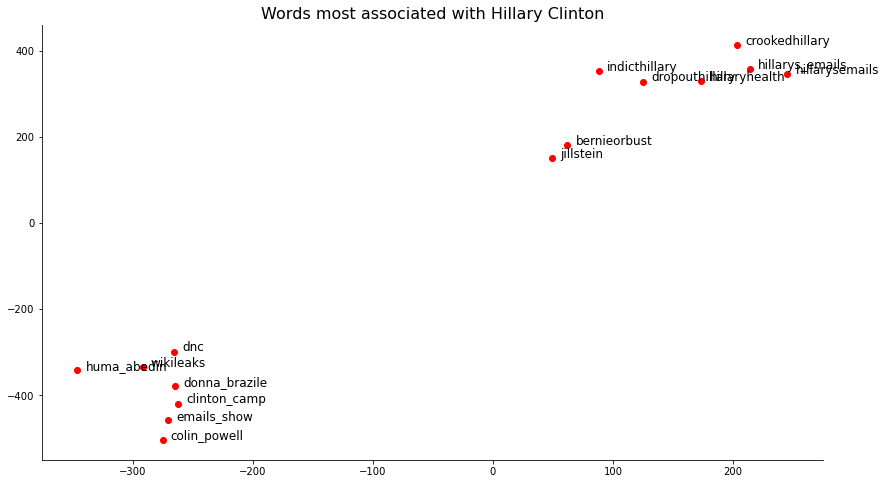

In [17]:
tnse_plots([hc_words], colors=['red'], 
           title='Words most associated with Hillary Clinton',
          )

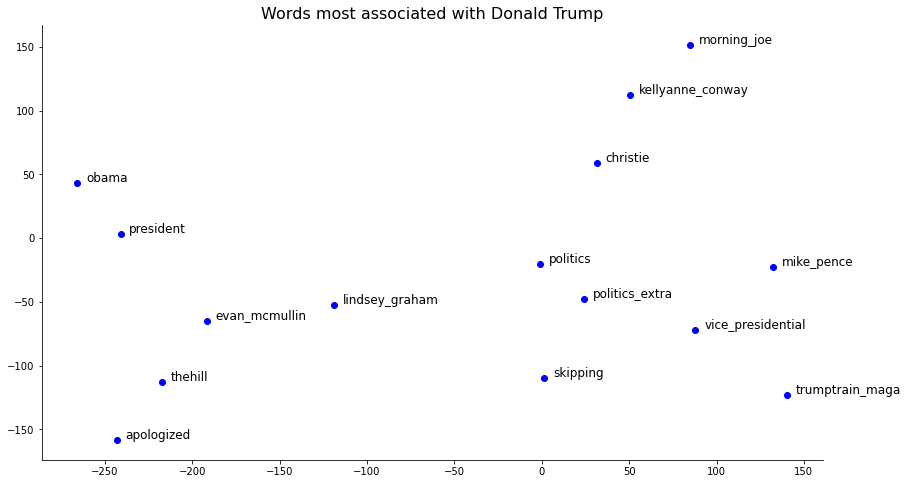

In [18]:
tnse_plots([dt_words], colors=['blue'], 
           title='Words most associated with Donald Trump',
          )

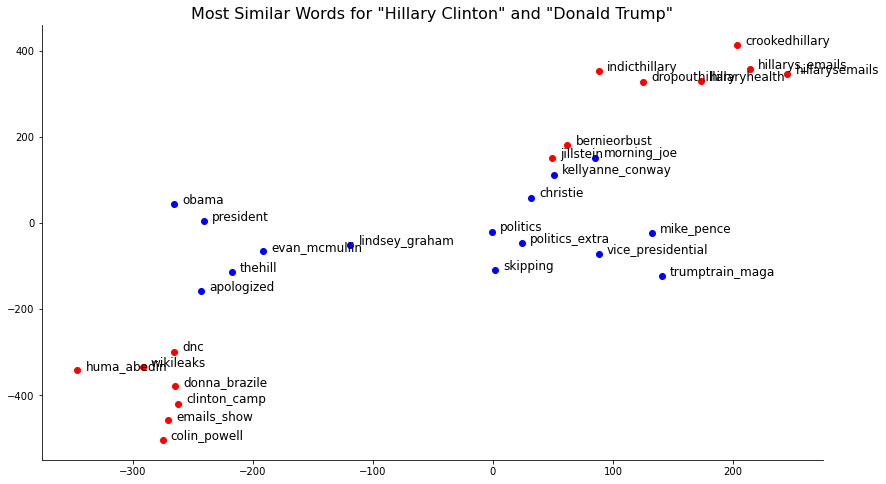

In [19]:
tnse_plots([hc_words, dt_words], 
           colors=['red', 'blue'], 
           title='Most Similar Words for "Hillary Clinton" and "Donald Trump"',
           point_labels=True)

In [25]:
christian_scores = model.wv.most_similar(positive='christian', topn=20)

word_scores(christian_scores)

Word Similarity Scores
---------------------------
bible                0.3660
muslims              0.3412
quran                0.3306
extremist            0.3260
christianity         0.3255
billwarnerphd        0.3231
mosque               0.3204
gospel               0.3143
koran                0.3133
islam                0.3082
catholic             0.3038
muslim               0.3020
jihadi               0.2997
convert              0.2994
quebec               0.2962
cathedral            0.2956
prophet              0.2936
bansharia            0.2913
evangelical          0.2912
christians           0.2889


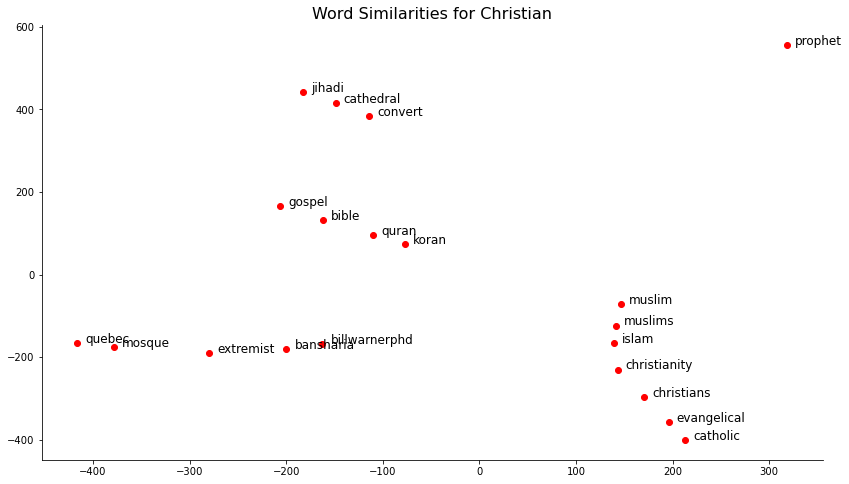

In [27]:
christian = [word[0] for word in christian_scores]

tnse_plots([christian], 
           colors=['red'], 
           title='Word Similarities for Christian',
           point_labels=True)

In [36]:
cop_scores = model.wv.most_similar(positive='cop', topn=20)

word_scores(cop_scores)

Word Similarity Scores
---------------------------
police_officer       0.5791
cops                 0.5252
unarmed              0.5066
btp                  0.4775
policebrutality      0.4739
officer              0.4680
suspect              0.4487
fatally              0.4354
lapd                 0.4282
man                  0.3958
shoots               0.3925
inmate               0.3889
nypd                 0.3842
freddiegray          0.3837
policeman            0.3817
shooting             0.3795
teens                0.3784
teen                 0.3729
san_diego            0.3672
shot                 0.3636


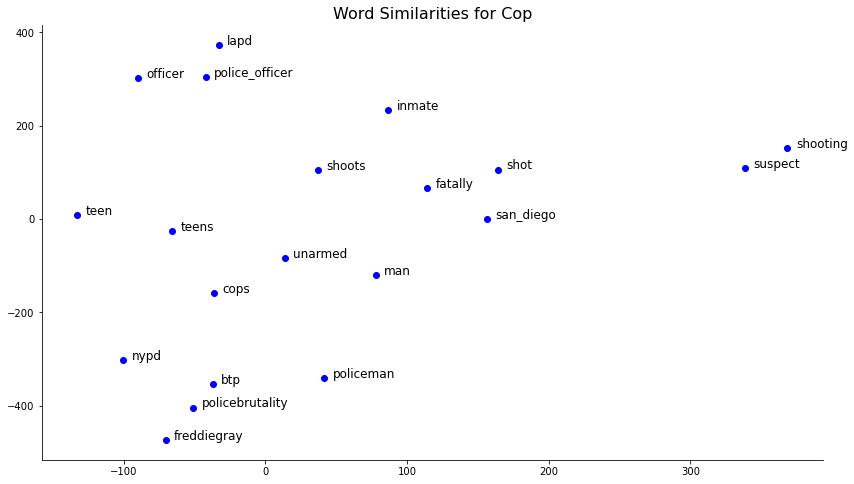

In [38]:
cop = [word[0] for word in cop_scores]

tnse_plots([cop], 
           colors=['blue'], 
           title='Word Similarities for Cop',
           point_labels=True)

In [20]:
islam_scores = model.wv.most_similar(positive='islam', topn=20)

word_scores(islam_scores)

Word Similarity Scores
---------------------------
muslims              0.5607
religionofpeace      0.5191
religion             0.4993
christianity         0.4908
banislam             0.4830
incompatible         0.4774
quran                0.4732
islamistheproblem    0.4718
allah                0.4606
crusades             0.4596
koran                0.4575
sharia               0.4493
muslim               0.4448
ideology             0.4298
sharia_law           0.4266
bansharia            0.4195
securefreedom        0.4175
shariah              0.4148
radical_islam        0.4102
muhammad             0.4039


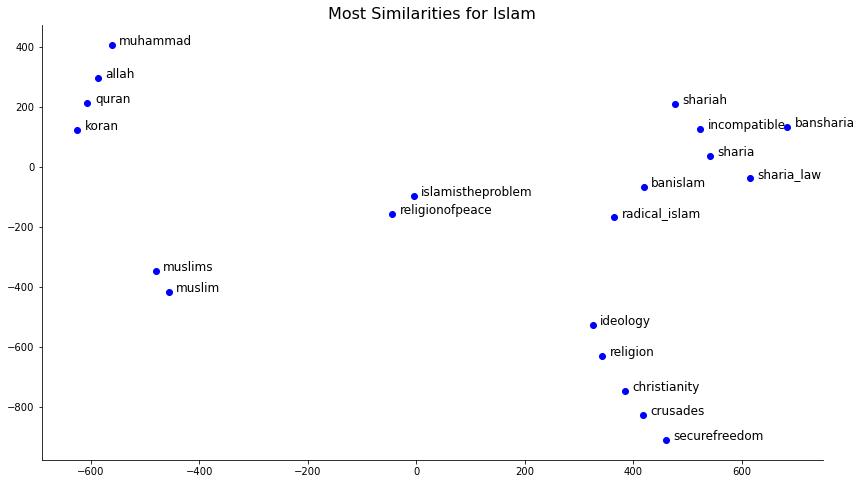

In [21]:
islam = [word[0] for word in islam_scores]

tnse_plots([islam], 
           colors=['blue'], 
           title='Word Similarities for Islam',
           point_labels=True)

In [22]:
blm_scores = model.wv.most_similar(positive='blacklivesmatter', topn=20)

word_scores(blm_scores)

Word Similarity Scores
---------------------------
blm                  0.5153
fergusonremembers    0.4817
lives_matter         0.4626
policebrutality      0.4604
blackskinisnotacrime 0.4525
alllivesmatter       0.4462
altonsterling        0.4452
milwaukee            0.4267
cops                 0.4163
police_brutality     0.4150
mikebrown            0.4148
ferguson             0.4112
panthers             0.4074
police_officers      0.4054
injustice            0.4006
black                0.4000
trumprotest          0.3996
black_lives          0.3923
police               0.3863
looting              0.3859


In [23]:
blm = [word[0] for word in blm_scores]

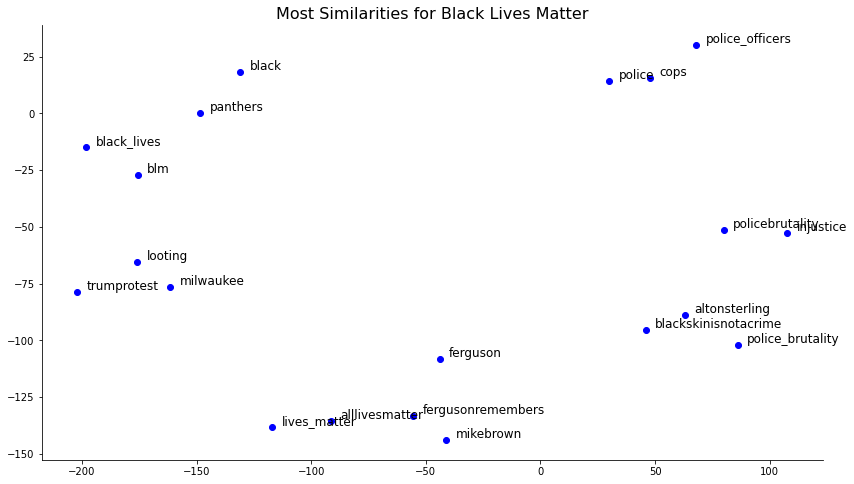

In [24]:
tnse_plots([blm], 
           colors=['blue'], 
           title='Word Similarities for Black Lives Matter',
           point_labels=True)